In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bayes Model comparison
Model 1: Fair coin $(p = 0.5)$ <br>
Model 2: Rigged to heads $(p = 0.9)$ <br>
Model 3: Rigged to tails $(p = 0.1)$ <br>

In [ ]:
# Step 1: Define the models and their prior probabilities
models = ['Fair', 'Heads_Rigged', 'Tails_Rigged']
models_p = [0.5, 0.9, 0.1]
priors = np.array([1/3, 1/3, 1/3])  # Equal prior probability for each model

# Step 2: Define the likelihoods based on the observed data
# Let's say we observed the following sequence of coin flips: 
data = ['H', 'H', 'T', 'T', 'H', 'H', 'H', 'H', 'H', 'H']
n_heads = data.count('H')
n_tails = len(data) - n_heads

# Likelihood of data given each model
likelihoods = np.array([
    models_p[0]**n_heads * (1 - models_p[0])**n_tails,      # Fair coin
    models_p[1]**n_heads * (1 - models_p[1])**n_tails,      # Rigged to heads
    models_p[2]**n_heads * (1 - models_p[2])**n_tails       # Rigged to tails
])

# Step 3: Calculate the evidence (marginal likelihood)
evidence = np.sum(likelihoods * priors)

# Step 4: Calculate the posterior probabilities using Bayes' theorem
posteriors = (likelihoods * priors) / evidence

# Display the results
for model, posterior in zip(models, posteriors):
    print(f"Posterior probability of {model}: {posterior:.4f}")


Posterior probability of Fair: 0.1849
Posterior probability of Heads_Rigged: 0.8151
Posterior probability of Tails_Rigged: 0.0000


## Bayes Update Rule
$$ \begin{align*}
P(\mathcal{M}_i|\text{data}) &= \frac{P(\text{data}|\mathcal{M}_i)P(\mathcal{M}_i)}{\sum_{j=1}^{3} P(\text{data}|\mathcal{M}_j)P(\mathcal{M}_j)} = \frac{P(\text{data}|\mathcal{M}_i)P(\mathcal{M}_i)}{P(\text{data})} \\ \\
\text{Posterior} &= \frac{\text{Likelihood} \times \text{Prior}}{\text{Evidence}}
\end{align*} $$

In [3]:
# Function to update beliefs after each coin toss
def update_beliefs(priors, outcome):
    # Define likelihoods based on outcome ('H' or 'T')
    if outcome == 'H':
        likelihoods = models_p # Likelihoods for [Fair, Heads_Rigged, Tails_Rigged]
    else:  # outcome == 'T'
        likelihoods = np.ones(3)-models_p  # Likelihoods for [Fair, Heads_Rigged, Tails_Rigged]
    
    # Step 1: Compute the marginal likelihood (evidence)
    evidence = np.sum(likelihoods * priors)
    
    # Step 2: Compute the posterior using Bayes' theorem
    posteriors = (likelihoods * priors) / evidence
    
    return posteriors

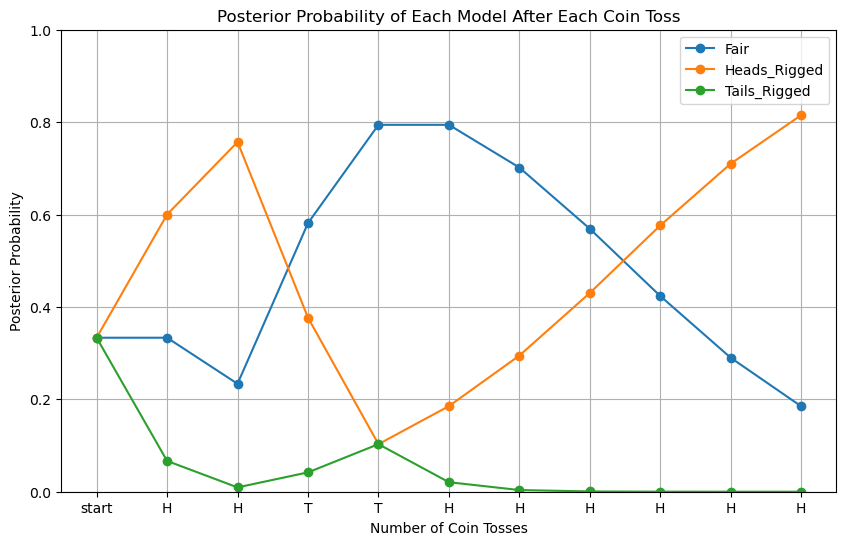

In [4]:
# Lists to store the posterior probabilities for plotting
priors = np.array([1/3, 1/3, 1/3])  # Reset priors
posterior_probs = {model: [p] for p, model in zip(priors, models)}

# Iterate through each coin toss and update beliefs sequentially
for i, toss in enumerate(data):
    priors = update_beliefs(priors, toss)  # Update priors with posteriors from the last toss
    
    # Store the updated posterior probabilities
    for model, posterior in zip(models, priors):
        posterior_probs[model].append(posterior)

# Plotting the results
plt.figure(figsize=(10, 6))
for model in models:
    plt.plot(range(0, len(data) + 1), posterior_probs[model], marker='o', label=model)

plt.xlabel('Number of Coin Tosses')
plt.ylabel('Posterior Probability')
plt.title('Posterior Probability of Each Model After Each Coin Toss')
plt.legend()
plt.xticks(range(0, len(data) + 1), ["start"]+data)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


In [5]:
# Iterate through each coin toss and update beliefs sequentially
priors = np.array([1/3, 1/3, 1/3])  # Reset the priors
for i, toss in enumerate(data):
    priors = update_beliefs(priors, toss)  # Update priors with posteriors from the last toss
    print(f"After toss {i+1} ({toss}):")
    for model, posterior in zip(models, priors):
        print(f"Posterior probability of {model}: {posterior:.4f}")
    print("")

After toss 1 (H):
Posterior probability of Fair: 0.3333
Posterior probability of Heads_Rigged: 0.6000
Posterior probability of Tails_Rigged: 0.0667

After toss 2 (H):
Posterior probability of Fair: 0.2336
Posterior probability of Heads_Rigged: 0.7570
Posterior probability of Tails_Rigged: 0.0093

After toss 3 (T):
Posterior probability of Fair: 0.5814
Posterior probability of Heads_Rigged: 0.3767
Posterior probability of Tails_Rigged: 0.0419

After toss 4 (T):
Posterior probability of Fair: 0.7942
Posterior probability of Heads_Rigged: 0.1029
Posterior probability of Tails_Rigged: 0.1029

After toss 5 (H):
Posterior probability of Fair: 0.7942
Posterior probability of Heads_Rigged: 0.1853
Posterior probability of Tails_Rigged: 0.0206

After toss 6 (H):
Posterior probability of Fair: 0.7017
Posterior probability of Heads_Rigged: 0.2947
Posterior probability of Tails_Rigged: 0.0036

After toss 7 (H):
Posterior probability of Fair: 0.5692
Posterior probability of Heads_Rigged: 0.4302
Post

# Bayes Factor

In [6]:
# Small epsilon for numerical stability (avoid division by zero)
epsilon = 1e-10
likelihoods = np.clip(likelihoods, epsilon, 1)

# Step 1: Calculate the Bayes Factors for all pairs
n_models = len(models)
bayes_factors_matrix = np.zeros((n_models, n_models))

for i in range(n_models):
    for j in range(n_models):
        if i != j:
            bayes_factors_matrix[i][j] = likelihoods[i] / likelihoods[j]

# Step 2: Aggregate evidence for each model (sum log of Bayes Factors for stability)
log_bayes_factors = np.log(bayes_factors_matrix + epsilon)

# Sum the log Bayes Factors across all comparisons for each model
scores = np.sum(log_bayes_factors, axis=1)

# Step 3: Determine the best-fitting model
best_model_idx = np.argmax(scores)
best_model = models[best_model_idx]

# Output the results
print("Bayes Factors Matrix (log scale):")
print(log_bayes_factors)
print("\nModel Scores (sum of log Bayes Factors):")
for model, score in zip(models, scores):
    print(f"{model}: {score:.4f}")

print(f"\nThe best-fitting model is: {best_model}")

Bayes Factors Matrix (log scale):
[[-23.02585093  -1.48341749  11.69992997]
 [  1.48341749 -23.02585093  13.18334746]
 [-11.69991791 -13.18329432 -23.02585093]]

Model Scores (sum of log Bayes Factors):
Fair: -12.8093
Heads_Rigged: -8.3591
Tails_Rigged: -47.9091

The best-fitting model is: Heads_Rigged


# Model comparison using SBI
## Setup simulator
First we define a simulator that generates data for a coin flip experiment. The simulator take a random number between 0 and 1. <br>
The simulator returns a 0 for Heads and 1 for Tails. <br>

In [56]:
from scipy.stats import beta, norm
import sbi.utils as utils
import torch

In [8]:
def simulator(theta):
     return beta.pdf(theta, 5, 2)

In [9]:
prior = utils.BoxUniform(low=torch.tensor([0.0]), high=torch.tensor([1.0]))

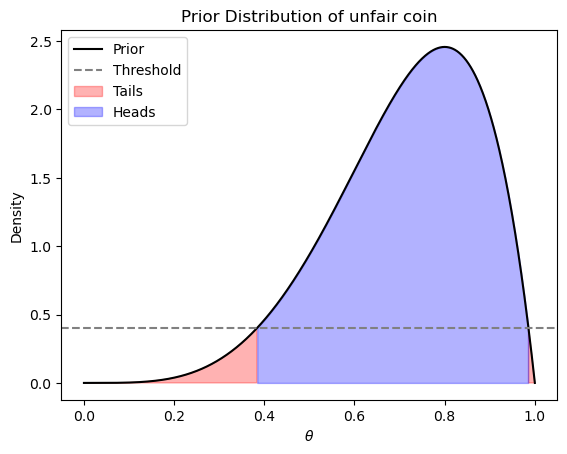

In [10]:
x = np.linspace(0, 1, 1000)
y = simulator(x)
threshold = 0.4

plt.plot(x, y, label='Prior', color='black')

plt.axhline(threshold, color='gray', linestyle='--', label='Threshold')

# fill area under the curve where y<=threshold and label Tails
plt.fill_between(x, y, where=y<=threshold, color='red', alpha=0.3, label='Tails')
# fill area under the curve where y>0.5 and label Heads
plt.fill_between(x, y, where=y>threshold, color='blue', alpha=0.3, label='Heads')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.title('Prior Distribution of unfair coin')
plt.legend()

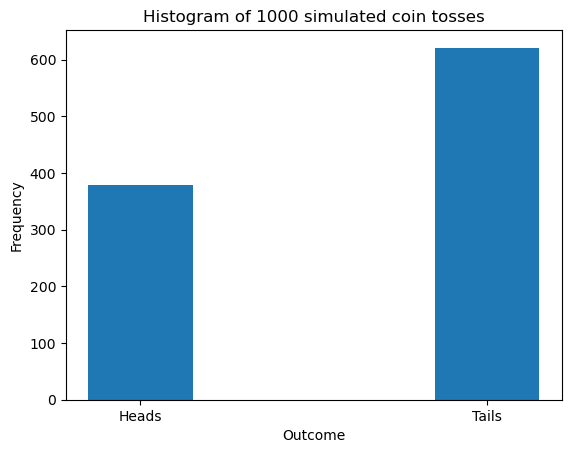

In [11]:
# make 1000 simulations and plot histogram
theta = [prior.sample() for _ in range(1000)]
coin_toss = np.heaviside(simulator(theta)-0.4, 0)

plt.hist(coin_toss, bins=2, rwidth=0.3, label='Simulated coin tosses')
plt.xticks([0.25, 0.75], ['Heads', 'Tails'])
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Histogram of 1000 simulated coin tosses')
plt.show()

/var/folders/bl/y6h058c51nv6bzn1rdfnwrm40000gn/T/ipykernel_6610/3190319796.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  colors = [c[int(np.heaviside(simulator(n)-0.4, 0))] for n in theta]


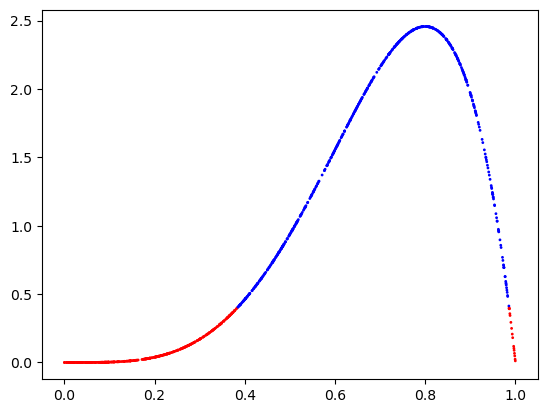

In [12]:
c = ['red', 'blue']
colors = [c[int(np.heaviside(simulator(n)-0.4, 0))] for n in theta]
plt.scatter(theta, simulator(theta), s=1, color=colors)

## Train a NN to approximate the simulator
We train a neural network to approximate the simulator. The neural network takes a random number between 0 and 1 and returns a 0 for Heads and 1 for Tails. <br>

In [13]:
# define NN to approximate the simulator
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
class NN_Simulator(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = NN_Simulator()

In [15]:
# create training data
theta = prior.sample((10000,))
data = torch.tensor([simulator(t) for t in theta]).float()

/var/folders/bl/y6h058c51nv6bzn1rdfnwrm40000gn/T/ipykernel_6610/3831111306.py:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  data = torch.tensor([simulator(t) for t in theta]).float()


In [16]:
# train NN
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()

for epoch in range(50):
    epoch_loss = []
    for batch in range(0, len(data), 64):
        if batch+64 > len(data):
            break

        optimizer.zero_grad()
        output = model(theta[batch:batch+64].float())

        loss = criterion(output, data[batch:batch+64])
        loss.backward(retain_graph=True)
        optimizer.step()
        
        epoch_loss.append(loss.item())
    
    epoch_loss = np.array(epoch_loss).mean()

    print(f'Epoch {epoch}, Loss: {round(epoch_loss, 10)}')

        

Epoch 0, Loss: 0.7371147384
Epoch 1, Loss: 0.2874004215
Epoch 2, Loss: 0.2091635289
Epoch 3, Loss: 0.1920773932
Epoch 4, Loss: 0.1789602372
Epoch 5, Loss: 0.1663758488
Epoch 6, Loss: 0.15318362
Epoch 7, Loss: 0.1390858647
Epoch 8, Loss: 0.1240073453
Epoch 9, Loss: 0.1092326404
Epoch 10, Loss: 0.0951236266
Epoch 11, Loss: 0.0824226056
Epoch 12, Loss: 0.0713327299
Epoch 13, Loss: 0.0616303361
Epoch 14, Loss: 0.0532290737
Epoch 15, Loss: 0.0459459793
Epoch 16, Loss: 0.0396535943
Epoch 17, Loss: 0.0342253318
Epoch 18, Loss: 0.0295581624
Epoch 19, Loss: 0.0255342836
Epoch 20, Loss: 0.0220649902
Epoch 21, Loss: 0.0190990825
Epoch 22, Loss: 0.0165441105
Epoch 23, Loss: 0.0143330265
Epoch 24, Loss: 0.0124399604
Epoch 25, Loss: 0.0108123631
Epoch 26, Loss: 0.0094094057
Epoch 27, Loss: 0.0081994623
Epoch 28, Loss: 0.0071538536
Epoch 29, Loss: 0.0062510564
Epoch 30, Loss: 0.0054702957
Epoch 31, Loss: 0.0047945761
Epoch 32, Loss: 0.0042072925
Epoch 33, Loss: 0.0036950559
Epoch 34, Loss: 0.00324721

## Test NN

In [17]:
# plot the learned simulator
theta = torch.linspace(0, 1, 1000).unsqueeze(1)
output = model(theta)
coin = np.heaviside(output.detach().numpy()-0.4, 0).astype(int)

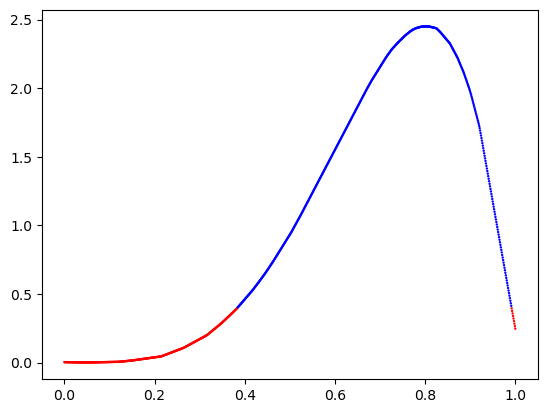

In [18]:
c = ['red', 'blue']
colors = [c[n[0]] for n in coin]
plt.scatter(theta.detach().numpy(), output.detach().numpy(), s=0.5, color=colors)

## Train NPE
Train a Neural Posterior Estimation (NPE) model to approximate the posterior distribution of the model parameters given the data. <br>

In [19]:
from sbi.utils.user_input_checks import check_sbi_inputs, process_prior, process_simulator
from sbi.inference import NPE, simulate_for_sbi

In [116]:
def sbi_simulator(theta):
    x = model(theta)
    return x.detach().numpy()

In [117]:
prior, num_parameters, prior_returns_numpy = process_prior(prior)
sbi_simulator = process_simulator(sbi_simulator, prior, prior_returns_numpy)
check_sbi_inputs(sbi_simulator, prior)

In [118]:
inference = NPE(prior=prior, show_progress_bars=True)
theta, x = simulate_for_sbi(sbi_simulator, proposal=prior, num_simulations=100000)
density_estimator = inference.append_simulations(theta, x).train()
posterior = inference.build_posterior(density_estimator)

  0%|          | 0/100000 [00:00<?, ?it/s]

/Users/bguenes/miniconda3/envs/sbi_model_comp/lib/python3.12/site-packages/sbi/neural_nets/net_builders/flow.py:141: UserWarning: In one-dimensional output space, this flow is limited to Gaussians
  x_numel = get_numel(


 Neural network successfully converged after 185 epochs.

In [131]:
sample = prior.sample()
posterior_samples = posterior.sample((10000,), x=sample)
mu_theta = posterior_samples.numpy().mean()
std_theta = posterior_samples.numpy().std()

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

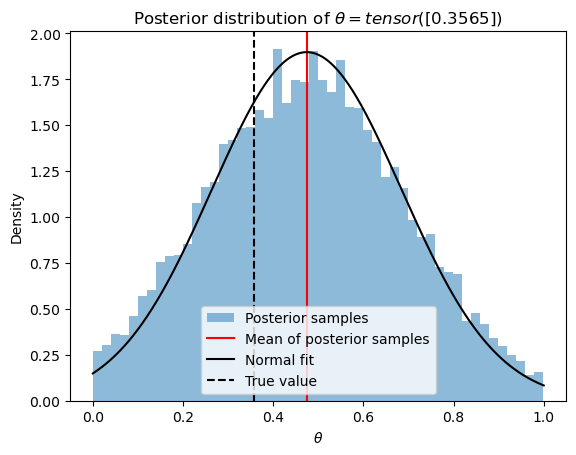

In [132]:
plt.hist(posterior_samples, bins=50, alpha=0.5, label='Posterior samples',density=True)
plt.axvline(mu_theta, color='red', label='Mean of posterior samples')
plt.plot(np.linspace(0,1, 1000), norm.pdf(np.linspace(0,1, 1000), mu_theta, std_theta), color='black', label='Normal fit')
plt.axvline(sample, color='black', linestyle='--', label='True value')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.title(rf'Posterior distribution of $\theta = {torch.round(sample,decimals=4)}$')
plt.legend()

In [134]:
import pickle

with open('data/posterior.pickle', 'wb') as f:
    pickle.dump(posterior, f)